In [1]:
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np

In [106]:
training_imgs=load_training_images("./train/")

In [4]:
def load_training_images(folder_path):
    images = []
    
    for filename in os.listdir(folder_path): 
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
 
    return images


In [5]:
def training_images(training_imgs,sift):
    keypoints_list, descriptors_list = [], []
    for img in training_imgs:
        gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        descriptors_list.append(des)
    return descriptors_list

In [6]:
def best_match(query_img,training_imgs):
    sift = cv2.SIFT_create()

    query_img_gray=cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
    keypoints_query, descriptors_query = sift.detectAndCompute(query_img_gray, None)
    

    descriptors_list=training_images(training_imgs,sift)

    bf = cv2.BFMatcher()

    best_matches_list = []

    for index,descriptors in enumerate(descriptors_list):
        
        matches = bf.knnMatch(descriptors_query, descriptors,k=2)
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)
        best_matches_list.append(len(good_matches))

    return np.argmax(best_matches_list)


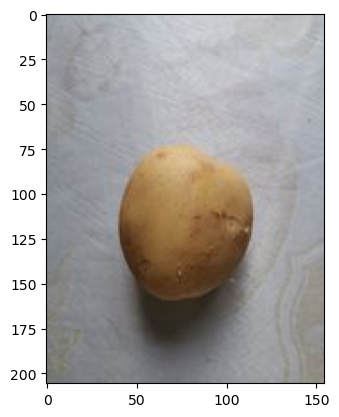

In [107]:
test_image=cv2.imread("./test/9.jpg") 
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [108]:
best=best_match(test_image,training_imgs)

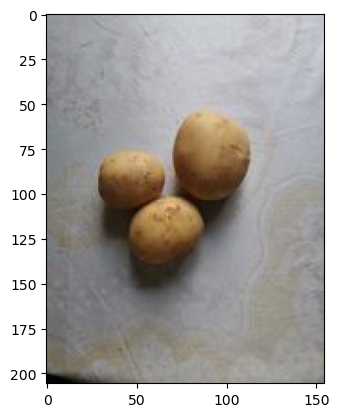

In [109]:
plt.imshow(cv2.cvtColor(training_imgs[best], cv2.COLOR_BGR2RGB))